In [2]:
import json
import pandas as pd

In [ ]:
label_base_path = './datasets/sample_images/라벨링데이터'
image_base_path = './datasets/sample_images/원천데이터'
emotion_path = '/EMOIMG_기쁨_SAMPLE'
emotion_label = '/img_emotion_training_data(기쁨).json'
with open(f'{label_base_path}{emotion_path}{emotion_label}','r') as f:
    emotion_data = json.load(f)
len(emotion_data)

60103

In [24]:
emotion_data[5650]

{'filename': '0cebc58b878df61c71de8e92bf181af059fe272b432e0ff5bab15d4aa12504f6_여_20_기쁨_공공시설&종교&의료시설_20201202161949-001-001.jpg',
 'gender': '여',
 'age': 20,
 'isProf': '전문인',
 'faceExp_uploader': '기쁨',
 'bg_uploader': '공공시설/종교/의료시설',
 'annot_A': {'boxes': {'maxX': 907.5517000000001,
   'maxY': 857.58057,
   'minX': 474.60160000000013,
   'minY': 275.38895},
  'faceExp': '기쁨',
  'bg': '공공시설/종교/의료'},
 'annot_B': {'boxes': {'maxX': 898.8581069692545,
   'maxY': 851.0090628941772,
   'minX': 503.28728789240546,
   'minY': 293.06717647341185},
  'faceExp': '기쁨',
  'bg': '공공시설/종교/의료'},
 'annot_C': {'boxes': {'maxX': 907.6370325098438,
   'maxY': 855.8241136471285,
   'minX': 495.6573333208772,
   'minY': 275.38365086697775},
  'faceExp': '기쁨',
  'bg': '상업시설/점포/시장'}}

In [ ]:
target_image = '0cebc58b878df61c71de8e92bf181af059fe272b432e0ff5bab15d4aa12504f6_여_20_기쁨_공공시설&종교&의료시설_20201202161949-001-001.jpg'
for idx,data in enumerate(emotion_data):
    if data['filename'] == target_image:
        print(idx, data['filename'])
        break

5650 0cebc58b878df61c71de8e92bf181af059fe272b432e0ff5bab15d4aa12504f6_여_20_기쁨_공공시설&종교&의료시설_20201202161949-001-001.jpg


In [32]:
emotion_data[0]['annot_A']['boxes']

{'maxX': 1912.2253, 'maxY': 1581.6027, 'minX': 1187.4949, 'minY': 579.22235}

./datasets/sample_images/원천데이터/EMOIMG_기쁨_SAMPLE/0cebc58b878df61c71de8e92bf181af059fe272b432e0ff5bab15d4aa12504f6_여_20_기쁨_공공시설&종교&의료시설_20201202161949-001-001.jpg


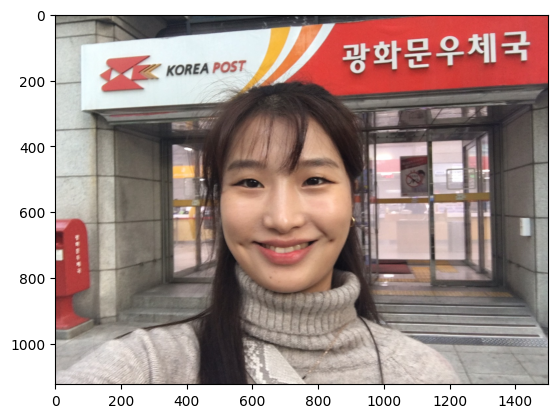

In [30]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
image_path = f"{image_base_path}{emotion_path}/{emotion_data[5650]['filename']}"
print(image_path)
img = Image.open(image_path)
np_img = np.array(img)
plt.imshow(np_img)
plt.show()

In [35]:
def crop(np_img, maxX,maxY,minX,minY):
    print(maxX, maxY, minX, minY)
    x2,y2,x1,y1 = int(maxX),int(maxY),int(minX),int(minY)
    img = cv2.rectangle(np_img,(x1,y1),(x2,y2),(0,255,0),2)
    plt.imshow(img)
    plt.show()

1890.909447114109 1567.448627450284 1183.8414475546967 596.9434661684523


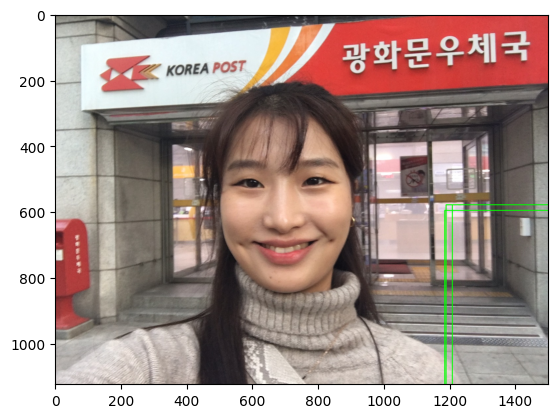

In [38]:
boxes = emotion_data[0]['annot_C']['boxes']
crop(np_img,**boxes)

In [ ]:
import os
from lib.landmark_util import face_landmark_from_rgbimage
base_path = './datasets/sample_images/원천데이터'
emotion_path = '/EMOIMG_당황_SAMPLE'
json_path = './datasets/sample_images/json'
for file in os.listdir(f'{base_path}{emotion_path}'):
    print(file)
    img = Image.open(image_path)
    np_img = np.array(img)
    landmark = face_landmark_from_rgbimage(np_img)
    if not os.path.exists(f'{json_path}{emotion_path}'):
        os.mkdir(f'{json_path}{emotion_path}')
    with open(f'{json_path}{emotion_path}/{file}.json', 'w') as f:
        json.dump(landmark,f,indent=4)
    # break

02dfd7b7659985e625f9fe8824d64569264ca48b2913efe0c20c8af0a4a3a017_남_30_기쁨_행사&사무공간_20210222180236-006-001.jpg
08c0d9389dbc222023035a3ef6ad78ff04b107aa756b0c228f2455ead387942e_여_20_기쁨_공공시설&종교&의료시설_20210208201331-001-001.jpg
08c0d9389dbc222023035a3ef6ad78ff04b107aa756b0c228f2455ead387942e_여_20_기쁨_상업시설&점포&시장_20210208201414-003-001.jpg
08c0d9389dbc222023035a3ef6ad78ff04b107aa756b0c228f2455ead387942e_여_20_기쁨_상업시설&점포&시장_20210208201414-003-002.jpg
08c0d9389dbc222023035a3ef6ad78ff04b107aa756b0c228f2455ead387942e_여_20_기쁨_상업시설&점포&시장_20210208201414-003-003.jpg
08c0d9389dbc222023035a3ef6ad78ff04b107aa756b0c228f2455ead387942e_여_20_기쁨_스포츠 관람 및 레저시설_20210209202314-004-001.jpg
0cebc58b878df61c71de8e92bf181af059fe272b432e0ff5bab15d4aa12504f6_여_20_기쁨_공공시설&종교&의료시설_20201202161949-001-001.jpg
0cebc58b878df61c71de8e92bf181af059fe272b432e0ff5bab15d4aa12504f6_여_20_기쁨_공공시설&종교&의료시설_20201202161949-001-002.jpg
0cebc58b878df61c71de8e92bf181af059fe272b432e0ff5bab15d4aa12504f6_여_20_기쁨_공공시설&종교&의료시설_20201202161949-001-0

['02dfd7b7659985e625f9fe8824d64569264ca48b2913efe0c20c8af0a4a3a017',
 '남',
 '30',
 '기쁨',
 '행사&사무공간',
 '20210222180236-006-001.jpg']